## Purpose of this notebook

[The huurcommissie](https://www.huurcommissie.nl) is an independent organisation that,
among other things, settling disputes initiated by renters and by landlords.

[Past cases](https://www.huurcommissie.nl/over-ons/eerdere-uitspraken) are listed and [searchable](https://hip.huurcommissie.nl/p/uitspraken). 
The search mentions a summary of useful properties of the case, 
what the difference in price was and roughly why that was decided,
sorted into some categories.

There are also PDFs with each case's details, [like this](https://hip.huurcommissie.nl/file?guid=73464968924890769),
anonymized for personal information (the address is still there).

License-wise, [the site seems to say "CC0 except where noted otherwise"](https://www.huurcommissie.nl/copyright).

In [107]:
import json
import pprint

import pandas

In [108]:
d = json.loads( open('huurcommissie').read() )

In [110]:
simpler_list = [] # list of key-value dicts, one for each case

for item in d['objects']:
    #pprint.pprint( item )
    #break

    # the given metadata is a little too complex, massage it to be easier for pandas to deal with
    simpler = {} 
    for k, v in item.get('attributes').items():
        simpler[k] = v['value']

    # add one field
    abv = simpler['AmountBeforeVerdict']
    aav = simpler['AmountAfterVerdict']
    if abv is not None  and  aav is not None:
        diff = float(aav)-float(abv)
        simpler['diff'] = diff
    
    simpler_list.append(simpler)

# ...and put it into a pandas DataFrame so we can play with it
df = pandas.DataFrame( simpler_list )

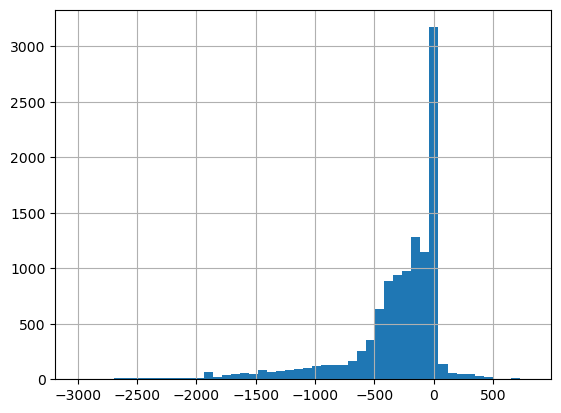

In [113]:
# overall idea of cost difference
df['diff'].hist( bins=50, range=(-3000,800), align='mid' )

# ...was interesting to set that range, but we might care to split that by _something_

In [114]:
# what fields do we have?
df

,ServiceCostBeforeVerdictYearThree,ServiceCostBeforeVerdictYearTwo,LawArticle,AmountAfterVerdict,VerdictDistrictJudge,AmountBeforeVerdict,TemporarilyDecreasedRent,VerdictSentDate,Title,Decision_OLD,...,ResidenceFullAddress,Submitter,ResidencePoints,LegesConviction,Decision,ResidenceType,OpenbaarRegister.AnonymizedVerdict_PublicProcedure,ServiceCostAfterVerdictYearThree,CaseNumber,diff
0,None,None,Art_4_4_UHW,None,None,622.32,None,1675119600000,Object_against_chairman_verdict,Not_grounded,...,"Laan van Vollenhove 579 3706CR, ZEIST",Tenant,None,None,Niet gegrond,IndependentHouse,73464968924114879,None,516782,NaN
1,None,None,Art_4_4_UHW,None,None,None,None,1704791379870,Object_against_chairman_verdict,None,...,"Broekhovenseweg 27-07 5021LA, TILBURG",Tenant,None,Does_not_apply,Gegrond,IndependentHouse,73464968924690795,None,2305343V,NaN
2,None,None,Art_7_257_BW,None,None,633.25,None,1657058400000,Rent_reduction_based_on_defects,No_defects,...,"Krugerplein 15-2 1092KA, AMSTERDAM",Tenant,None,Counterparty_vindicated,Geen ernstige gebreken,IndependentHouse,73464968923580925,None,463946,NaN
3,None,None,Art_7_260_BW_tenant,12,None,2325,None,1669158000000,Settlement_servicecosts,Settlement_landlord_missing,...,"Julianaweg 309-D 3523XC, UTRECHT",Tenant,None,Submitter_vindicated,De afrekening van verhuurder ontbreekt,IndependentHouse,73464968923930750,None,340267,-2313.00
4,None,None,Art_7_249_BW,482.14,None,630,None,1701073115553,Check_startrent,None,...,"Trompsingel 7-5 9724CX, GRONINGEN",Tenant,95,Submitter_vindicated,Huurprijs is niet redelijk,IndependentHouse,73464968924362077,None,2200732,-147.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22134,None,None,Art_7_257_BW,None,None,None,None,1697099451269,Rent_reduction_based_on_defects,Defects,...,"Wulphoek 42 3201JP, SPIJKENISSE",Tenant,None,Submitter_vindicated,Wel ernstige gebreken,IndependentHouse,73464968922423088,None,2303368,NaN
22135,None,None,Art_7_260_BW_tenant,None,None,None,None,1709262258699,Settlement_servicecosts,None,...,"Marsdiep 87 2401XB, ALPHEN AAN DEN RIJN",Tenant,None,Counterparty_vindicated,Servicekosten conform afrekening,IndependentHouse,73464968924877295,None,2305607,NaN
22136,None,None,Art_7_257_BW,None,None,None,None,1689928516549,Rent_reduction_based_on_defects,Inadmissible,...,"Goudse Rijweg 430 3031ZA, ROTTERDAM",Tenant,None,Does_not_apply,Niet ontvankelijk,IndependentHouse,73464968921959152,None,2306145,NaN
22137,None,None,Art_7_260_BW_tenant,782.49,None,2568,None,1625090400000,Settlement_servicecosts,Settlement_landlord_missing,...,"Hertog Hendrik van Brabantplein 20 5611PE, EIN...",Tenant,None,Submitter_vindicated,De afrekening van verhuurder ontbreekt,IndependentHouse,73464968923119172,None,168464,-1785.51


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9b4010af0>,
      dtype=object)

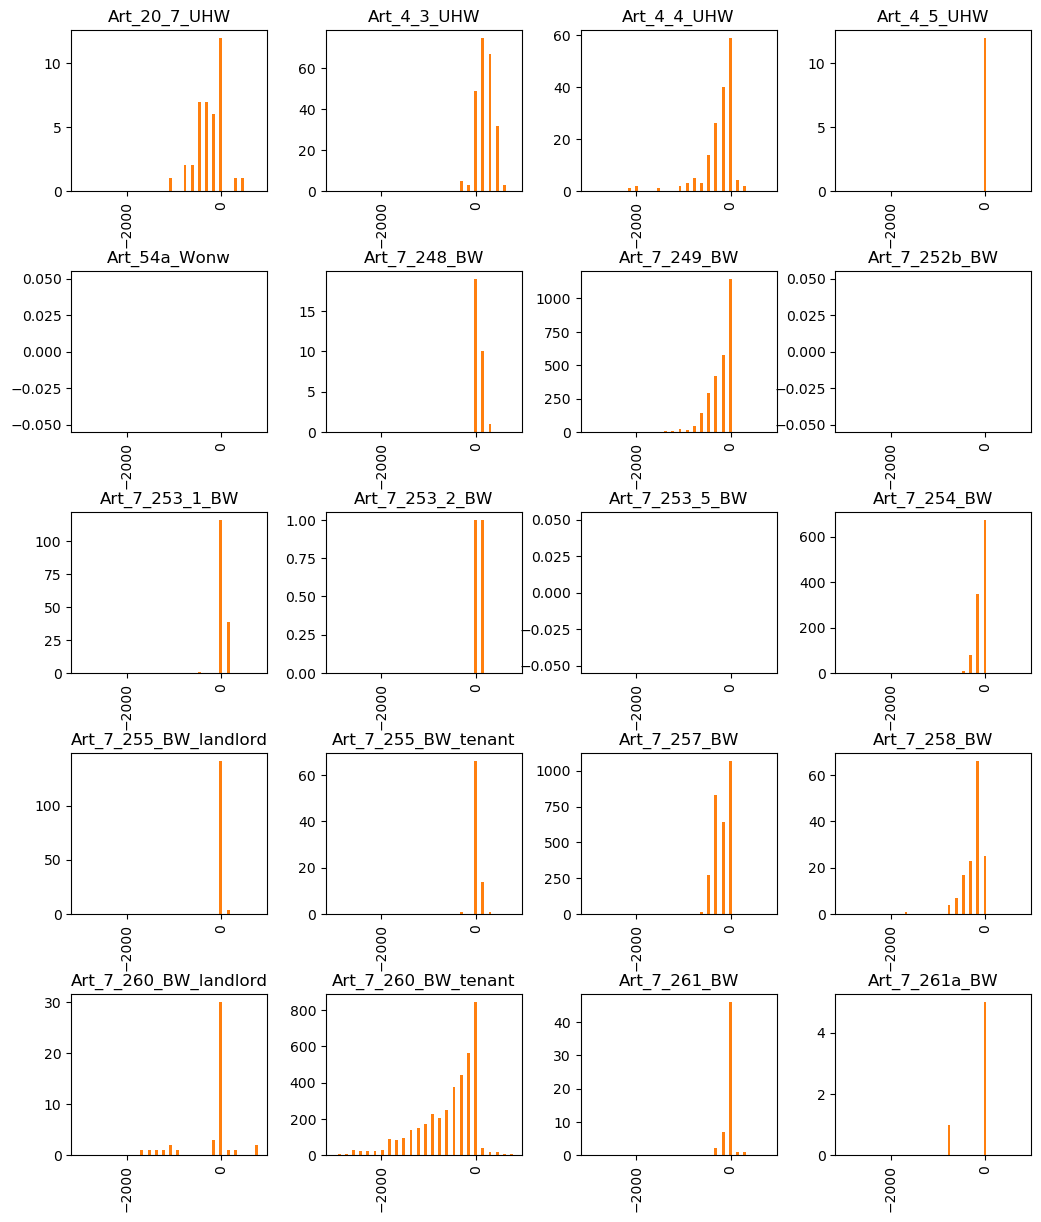

In [115]:
# It turns out pandas's hist has one feature that is very useful to us: grouping by a specific column's values
#   see also: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html

df.hist( bins=25, range=(-3000,800), by='LawArticle', figsize=(12,15),  )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9a8daffd0>,
      dtype=object)

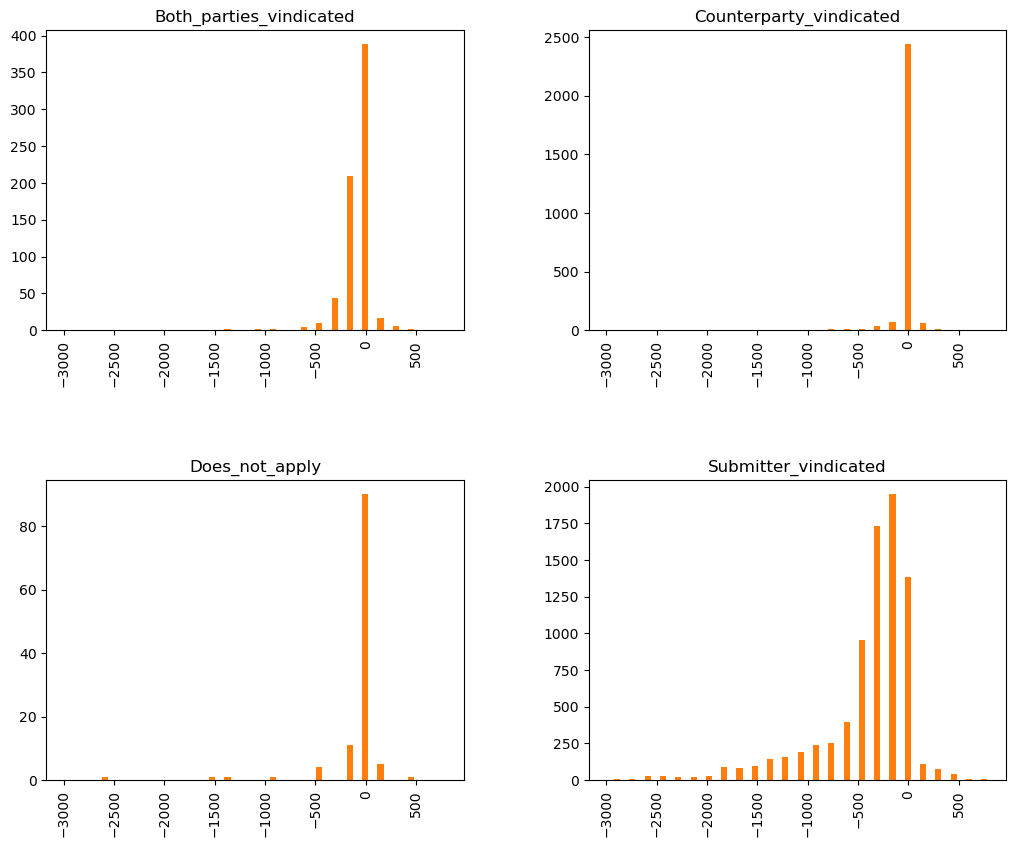

In [117]:
df.hist( bins=25, range=(-3000,800), by='LegesConviction', figsize=(12,10),  )


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9a8c302b0>,
      dtype=object)

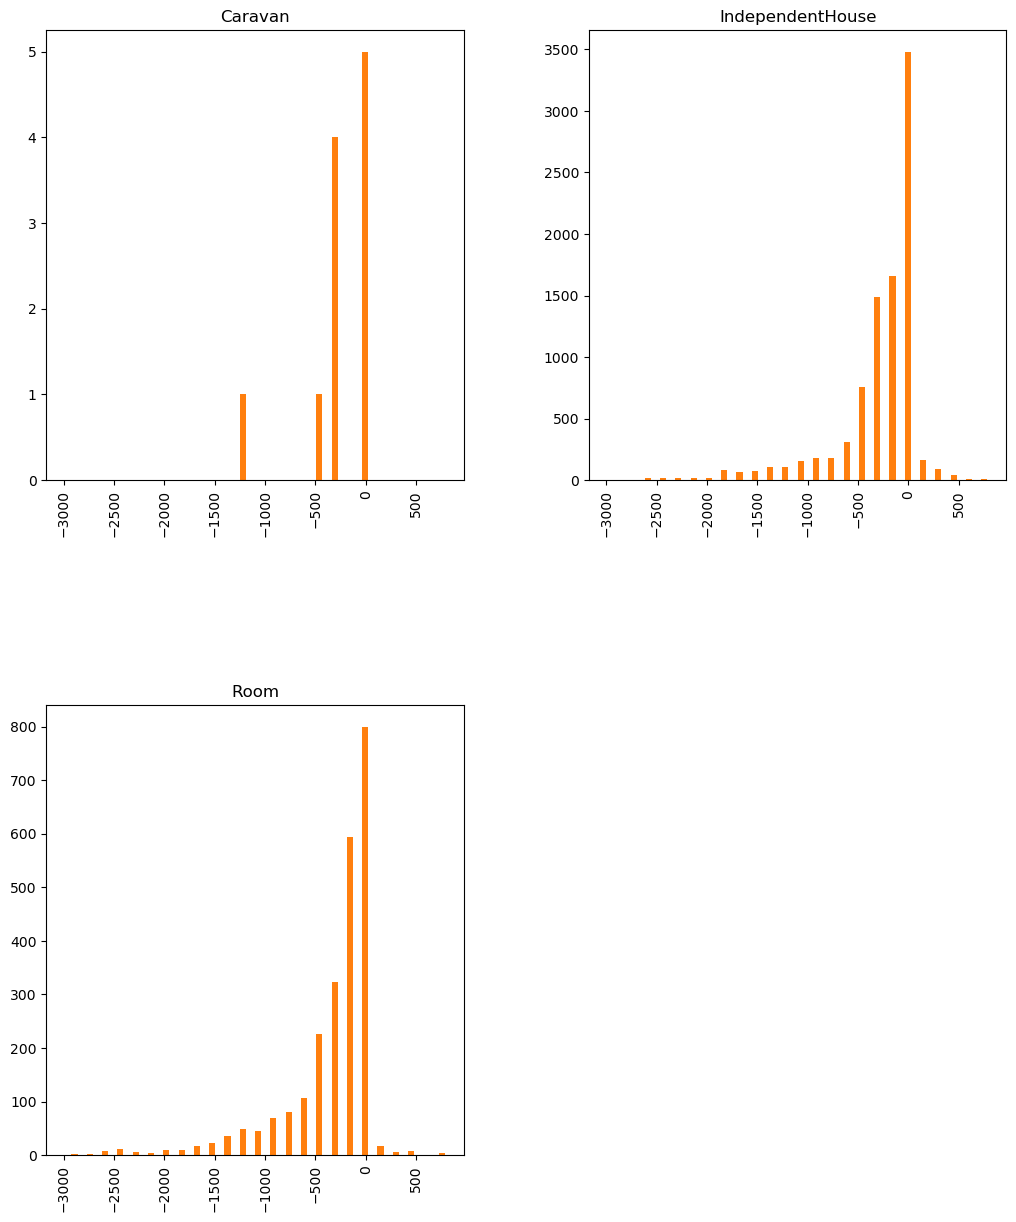

In [118]:
df.hist( bins=25, range=(-3000,800), by='ResidenceType', figsize=(12,15),  )


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9a89564c0>,
      dtype=object)

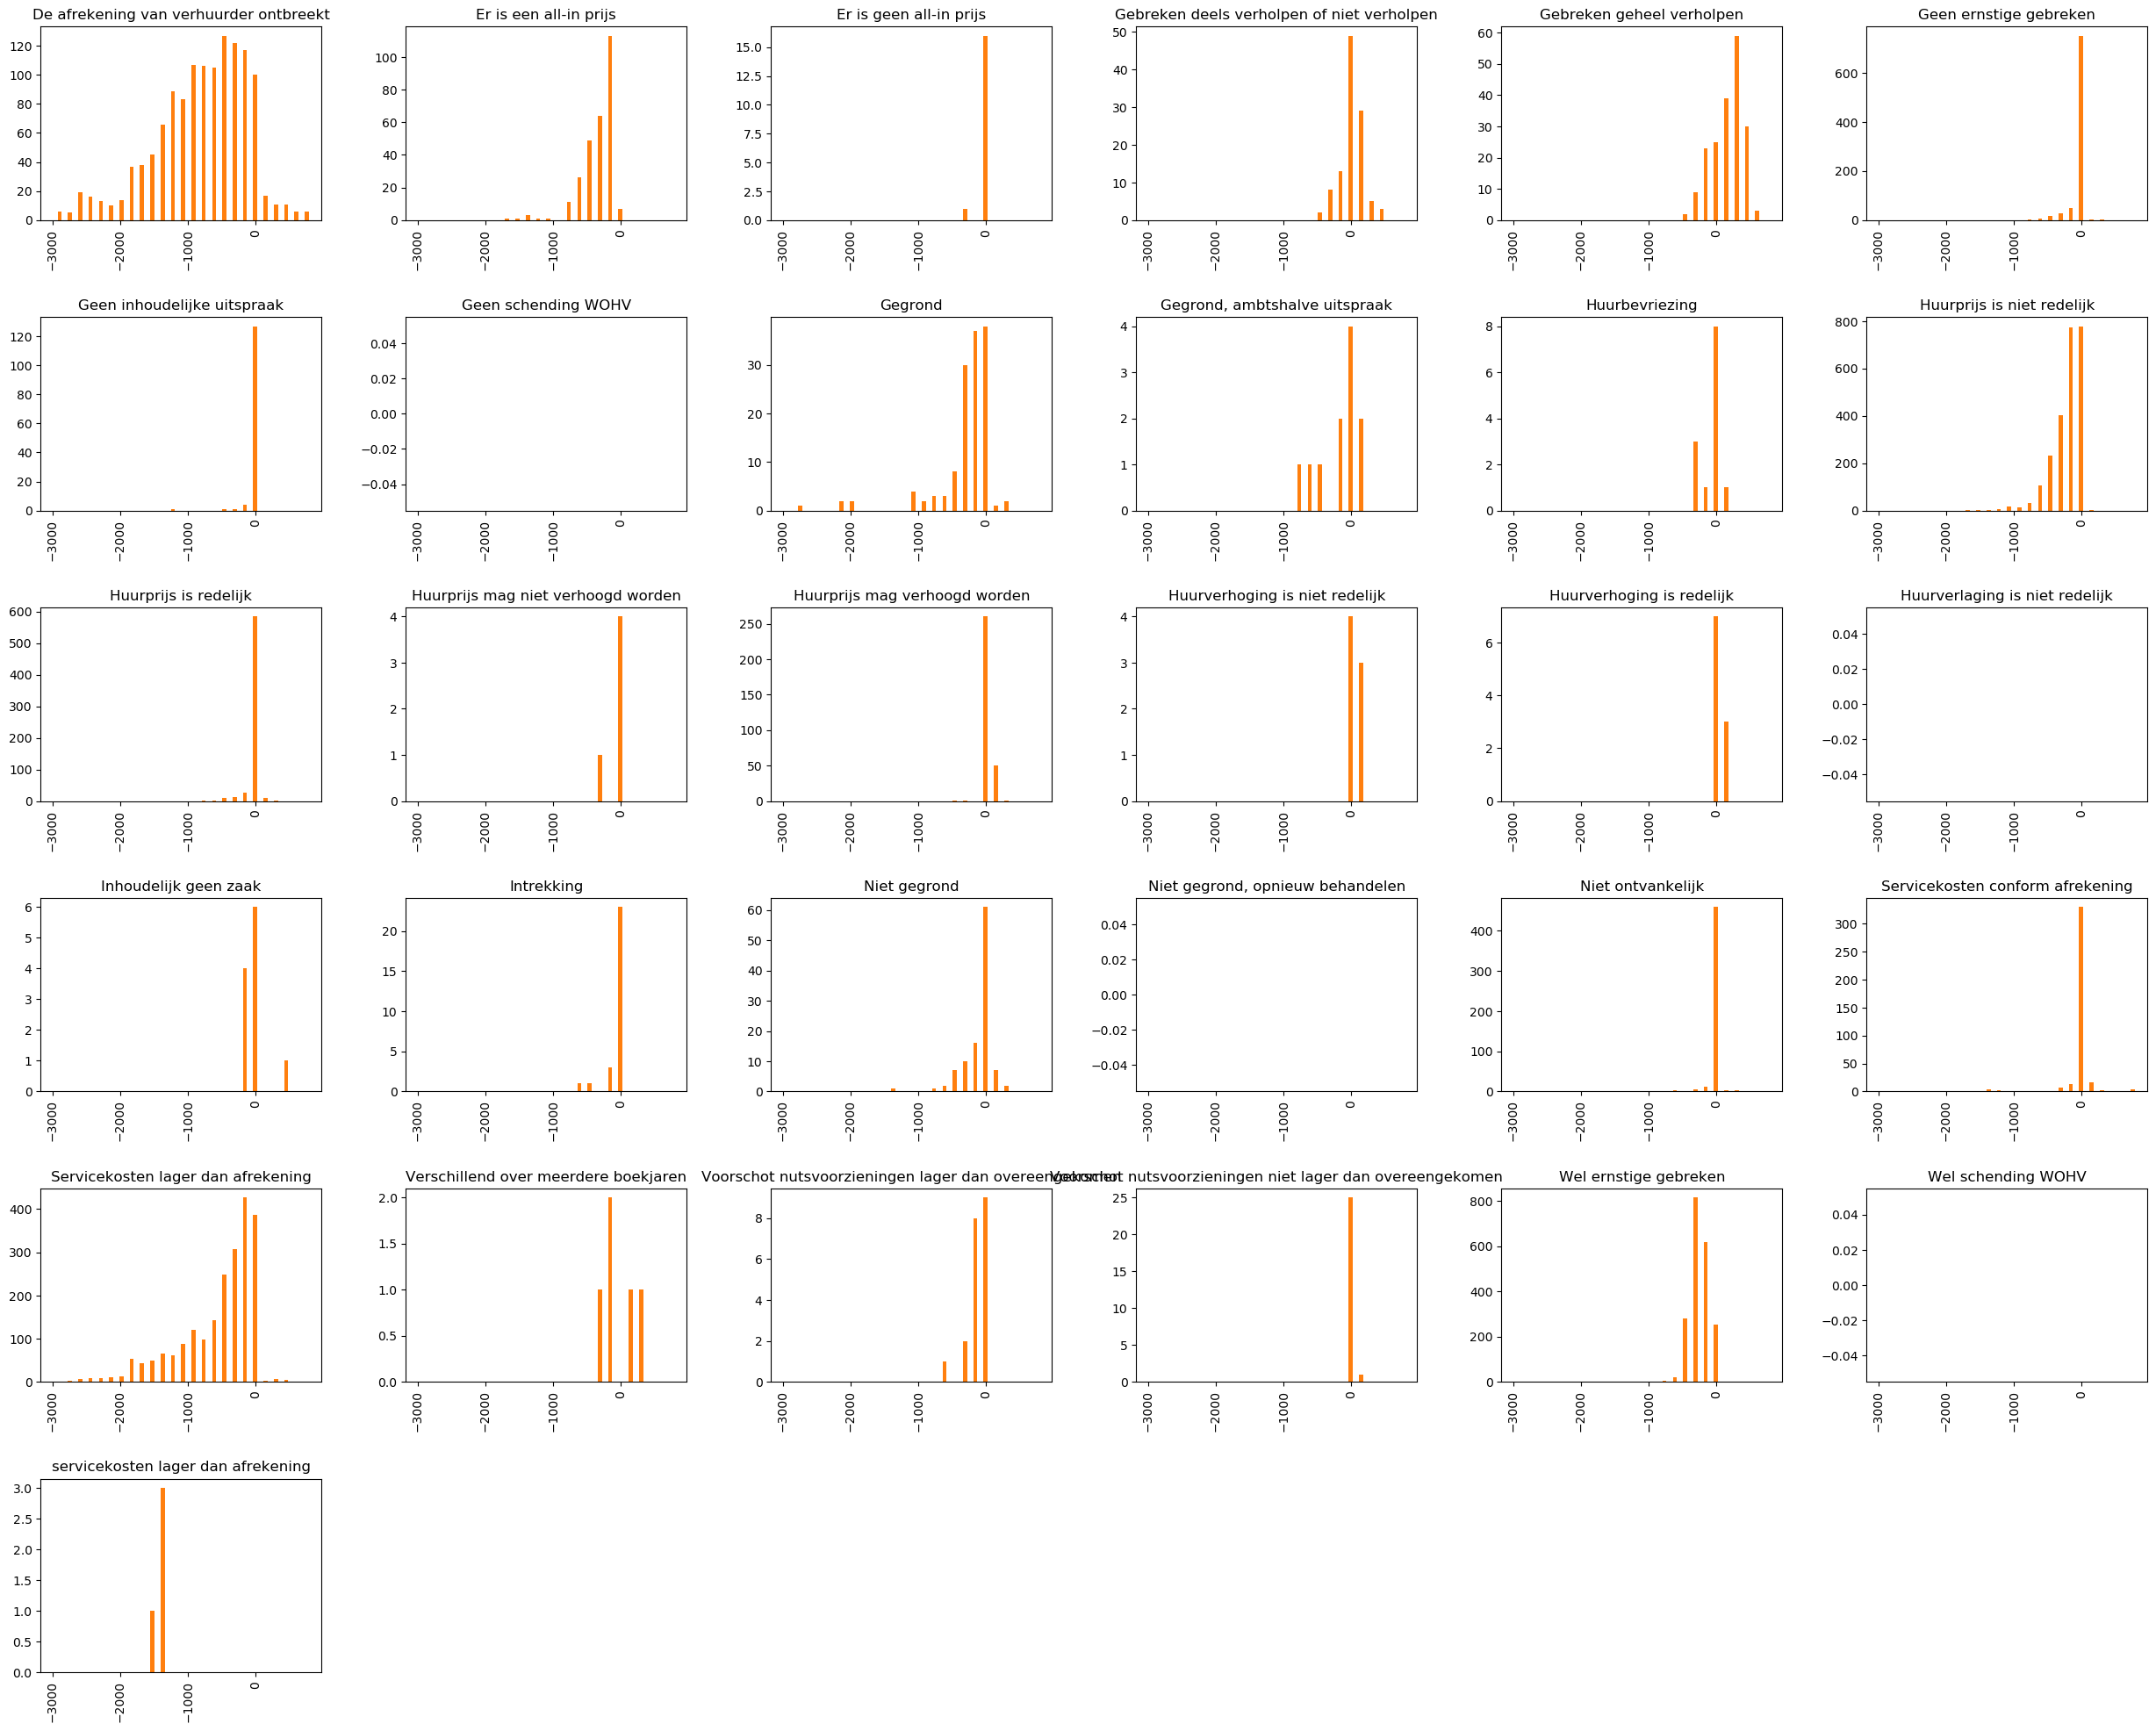

In [119]:
df.hist( bins=25, range=(-3000,800), by='Decision', figsize=(30,25),  )
